# Classification of Dogs & Cats using Fastai 

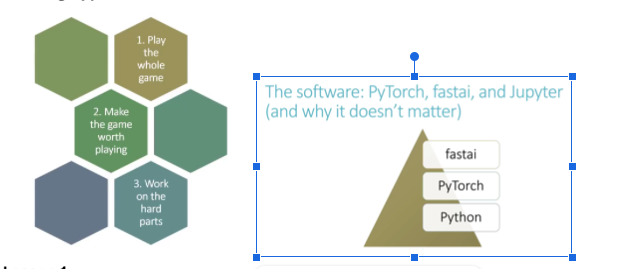

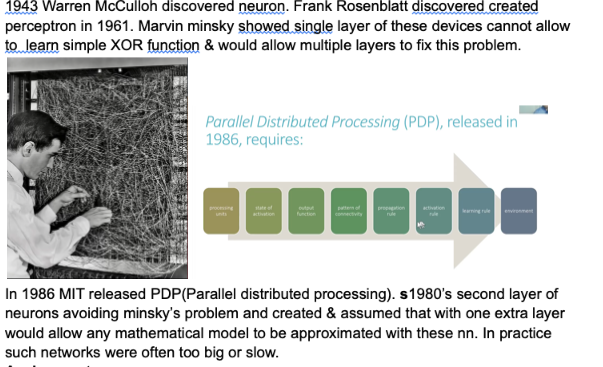

The Oxford-IIIT Pet [Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) is used. We have created a 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

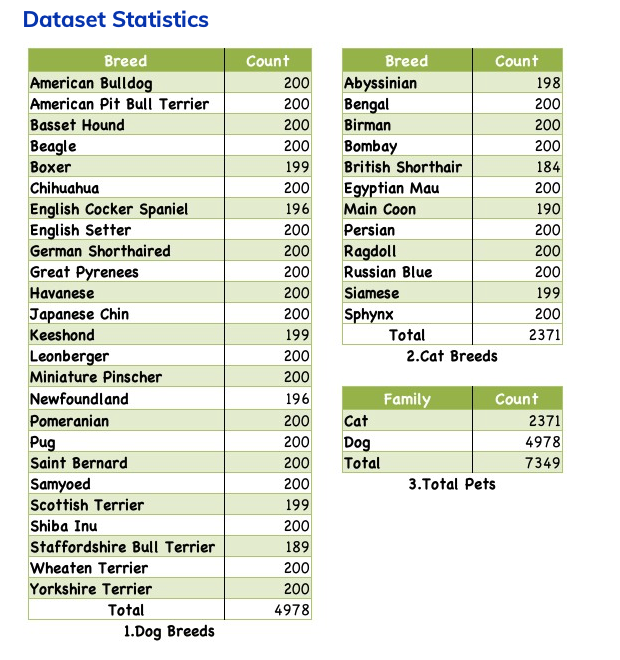

In [3]:
!pip install fastai

In [4]:
! pip list | grep fastai

fastai                        1.0.61


In [5]:
! pip install fastai --upgrade

     |████████████████████████████████| 189 kB 39.3 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [6]:
! pip list | grep fastai

fastai                        2.5.3


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!pip show fastbook

Name: fastbook
Version: 0.0.18
Summary: Deep Learning for Coders, 2020
Home-page: https://github.com/fastai/fastbook
Author: Jeremy Howard and Sylvain Gugger
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: nbdev, pandas, ipywidgets, sentencepiece, pip, fastai, requests, packaging
Required-by: 


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov 23 11:39:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi -L
#P100-PCIE has ~3584 cores

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-756e6be5-053f-1bcc-fe0c-4507f3bc34e7)


In [ ]:
!nvidia-smi pmon


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
 
if ram_gb < 20:
 print('Not using a high-RAM runtime')
else:
 print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [10]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.158809,0.032516,0.010149,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.058018,0.016715,0.006089,00:35


In [13]:
from fastai.vision.all import *
path = untar_data(URLs.CARS)/'images'

def cars(x): 
  dls = ImageDataLoaders.from_name_func(
      path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=cat, item_tfms=Resize(224))
  
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.142743,0.027797,0.008796,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.066846,0.007773,0.004060,00:36



NOTES on how the above function works !!!!! Extremely interesting... & Mind blowing!!
```
from fastai.vision.all import *

———————

ninjas-MacBook-Pro:vision ninjawarrior$ pwd
/Users/ninjawarrior/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/vision
ninjas-MacBook-Pro:vision ninjawarrior$ ls -lrt
total 232
-rw-r--r--   1 ninjawarrior  staff      1 Nov 20 19:29 __init__.py
-rw-r--r--   1 ninjawarrior  staff    206 Nov 20 19:29 all.py
-rw-r--r--   1 ninjawarrior  staff  41947 Nov 20 19:29 augment.py
-rw-r--r--   1 ninjawarrior  staff   9855 Nov 20 19:29 core.py
-rw-r--r--   1 ninjawarrior  staff   9859 Nov 20 19:29 data.py
-rw-r--r--   1 ninjawarrior  staff  14430 Nov 20 19:29 gan.py
-rw-r--r--   1 ninjawarrior  staff  14380 Nov 20 19:29 learner.py
-rw-r--r--   1 ninjawarrior  staff   3821 Nov 20 19:29 utils.py
-rw-r--r--   1 ninjawarrior  staff   3681 Nov 20 19:29 widgets.py
drwxr-xr-x  11 ninjawarrior  staff    352 Nov 20 19:29 __pycache__
drwxr-xr-x   8 ninjawarrior  staff    256 Nov 20 20:14 models


from . import models
from ..basics import *
from ..callback.all import *
from .augment import *
from .core import *
from .data import *
from .models.all import *
	from .xresnet import *
	from .unet import *
	from .tvm import *
from .learner import *
from .utils import *

———————

path = untar_data(URLs.PETS)/'images'

<function fastai.data.external.untar_data>
  <external.py> 

def untar_data(url, archive=None, data=None, c_key='data', force_download=False):#, extract_func=file_extract, timeout=4):
    "Download `url` to `fname` if `dest` doesn't exist, and extract to folder `dest`"
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base='~/.fastai’)
    return d.get(url, force=force_download, extract_key=c_key)


/Users/ninjawarrior/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/data
ninjas-MacBook-Pro:data ninjawarrior$ ls -lrt
total 200
-rw-r--r--   1 ninjawarrior  staff      1 Nov 20 19:29 __init__.py
-rw-r--r--   1 ninjawarrior  staff    140 Nov 20 19:29 all.py
-rw-r--r--   1 ninjawarrior  staff   9033 Nov 20 19:29 block.py
-rw-r--r--   1 ninjawarrior  staff   8665 Nov 20 19:29 checks.txt
-rw-r--r--   1 ninjawarrior  staff  18406 Nov 20 19:29 core.py
-rw-r--r--   1 ninjawarrior  staff   9436 Nov 20 19:29 download_checks.py
-rw-r--r--   1 ninjawarrior  staff   9190 Nov 20 19:29 load.py
-rw-r--r--   1 ninjawarrior  staff  15397 Nov 20 19:29 transforms.py
drwxr-xr-x  10 ninjawarrior  staff    320 Nov 20 19:29 __pycache__
-rw-r--r--   1 ninjawarrior  staff   5330 Nov 20 20:09 external.py





<fastdownload>
__init__.py
from fastdownload.core import *

In core file … 


   "PETS":[
      "https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz",
      811706944,
      "e4db5c768afd933bb91f5f594d7417a4"


```



In [ ]:
fastai.vision.all

In [ ]:
untar_data

<function fastai.data.external.untar_data>

In [9]:
cnn_learner

NameError: ignored

In [8]:
create_body

NameError: ignored

In [ ]:
fastdownload

NameError: ignored

In [ ]:
1+1

2

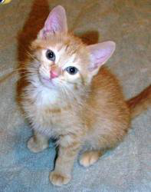

In [ ]:
from fastbook import *
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999548


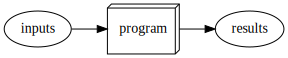

In [ ]:
#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')



1.   Do you need these for deep learning?
Lots of math T / F
Lots of data T / F
Lots of expensive computers T / F
A PhD T / F 
 
  **Ans** : High school math is enough. Yes lot of relevant data is needed. No need of expensive computers. No need of Phd. 

2.  Name five areas where deep learning is now the best in the world.

 **Ans** : Detecting cancer, Self driving cars, Computer vision, Object detection, Image detection. 

3. What was the name of the first device that was based on the principle of the artificial neuron?
 
 **Ans** :Perceptron

4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?

5. What were the two theoretical misunderstandings that held back the field of neural networks?

 **Ans** : Marvin misky assumed just by adding another single layer of neural devices like perceptron is enough to process all the mathematical computations and people didn’t notice that part of this book and got lost for decades on this information. 
In 1980’s when second layer was created but we need more layers which was ignored for long time. 

6. What is a GPU?

 **Ans** : GPU is a graphical processing unit. It has as many as ~3500 cores and does parallel processing. It is not great for simple tasks for which CPU that uses serial way of computing can be used. When there are complex tasks it can be sub modules and processed parallely, taking much less time to finish the task. 

7. Open a notebook and execute a cell containing: 1+1. What happens?

 **Ans** : Done

8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.

9. Complete the Jupyter Notebook online appendix.

10. Why is it hard to use a traditional computer program to recognize images in a photo?

 **Ans** : Traditional computer program does not have a performance measuring mechanism and hence the model is not improvised and hence cannot perform complex tasks. 

 11. What did Samuel mean by "weight assignment"?

 **Ans** :Weights are the parameters when tweaked can result in enhancing the performance of the model. 

 12. What term do we normally use in deep learning for what Samuel called "weights"?

 **Ans** : Weights = parameters

 13. Draw a picture that summarizes Samuel's view of a machine learning model.

 Machine learning learns from the experience by running a model rather than manually coding individual  to learn the experience. 
 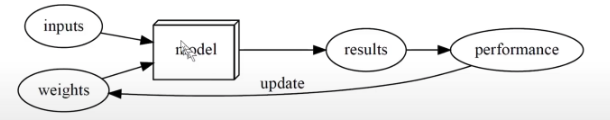

14. Why is it hard to understand why a deep learning model makes a particular prediction?
15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
16. What do you need in order to train a model?
17. How could a feedback loop impact the rollout of a predictive policing model?
18. Do we always have to use 224×224-pixel images with the cat recognition model?
19. What is the difference between classification and regression?
20. What is a validation set? What is a test set? Why do we need them?
21. What will fastai do if you don't provide a validation set?



